# Import Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import KFold
import random
from sklearn.model_selection import cross_validate

# Import Data

In [2]:
data =pd.read_csv('combined_50_meters_till_feb21.csv')

## Data Cleaning

In [3]:
'''
Features
RH: Relative Humidity in Percent as measured by PurpleAir
PM25cfatm: AB channel averaged lower cf PM2.5 in ug/m3
TempC: Temperature in Celcius as measured by PurpleAir

Label
PM25FM: FEM or FRM PM2.5 in ug/m3

'''
# data = data[['PM25cfatm','TempC','RH','PM25FM']]
data.describe()
data.head()

# Reference to BAse Model for comparison
# PM2.5=0.524×PAcf_1−0.0862×RH+5.75
data['PM2.5 Ref Model Prediction'] = (data['PM2.5 (ATM)_a'] *0.524) - (0.0862*data['Humidity_a']) + 5.75


In [4]:
# Rearrange Data
data = data[['Temperature_a', 'Humidity_a','PM2.5 (ATM)_a','Sample Measurement','State', 'County', 'sensid', 'monid', 'latmon', 'lonmon','PM2.5 Ref Model Prediction']]

In [5]:
data.shape

(26968, 11)

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(26968, 11)

## Split data into Test and Train

In [8]:
x = np.array(data.iloc[:,0:3])
y = np.array(data.iloc[:,3])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
name=[]
score =[]
# average =[]
# maximum = []
# minimum = []
seed = 1
# scoring = 'accuracy'
# scoring = 'explained_variance'
# scoring = 'neg_mean_squared_error'
# scoring = 'neg_mean_absolute_percentage_error'
# scoring = 'neg_mean_absolute_error'
# scoring = 'r2'
scoring =['neg_mean_squared_error','neg_mean_absolute_error','r2']

# CART - Classification and Regression Tree

In [10]:
# create a regressor object
regressor = DecisionTreeRegressor() 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred1 = regressor.predict(X_test)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [11]:
# score1 = regressor.score(X_test,y_test)
# X_s, y_s =shuffle(X_test,y_test)
score1 =cross_validate(regressor,X_test,y_test, cv=cv,scoring = scoring) #'explained_variance' ,scoring = scoring
print((score1))
name.append('CART')
score.append(score1)
# average.append(np.mean(score1))
# maximum.append(max(score1))
# minimum.append(min(score1))

{'fit_time': array([0.02399039, 0.03203726, 0.01599002, 0.02399182, 0.02399492,
       0.02399468, 0.0239892 , 0.02393723, 0.01662159, 0.02451611]), 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_neg_mean_squared_error': array([ -60.77947091,  -60.46013299, -181.78377586, -123.62269455,
       -390.2251814 ,  -33.52176217,  -53.23475353, -117.81978004,
        -58.75859462, -476.29968882]), 'test_neg_mean_absolute_error': array([-3.14864486, -3.03302531, -3.56961693, -3.16585806, -3.61447237,
       -2.9271637 , -3.06512404, -3.03252803, -3.14954241, -4.26073544]), 'test_r2': array([-0.040966  ,  0.89188835,  0.66242905,  0.5108259 , -0.50820628,
        0.82491603,  0.81608324,  0.36326703,  0.83542593, -0.05519036])}


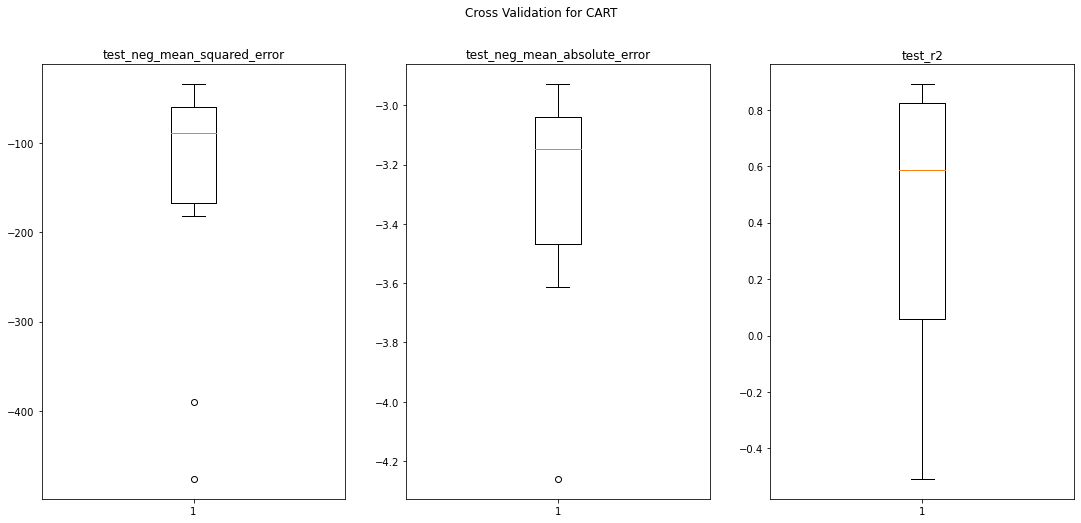

In [12]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.suptitle('Cross Validation for CART')
fig.set_size_inches(18.5, 8)
# fig.subplot(1,3)
a[0].boxplot(score1['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score1['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score1['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [14]:
# np.mean(score1)

In [15]:
m1 = (regressor,score1)

# Kernel Ridge Regression

In [16]:
from sklearn.kernel_ridge import KernelRidge

In [17]:
R = KernelRidge(alpha = 1.0)

R.fit(X_train, y_train)

# score2 = R.score(X_test,y_test)
score2 =cross_validate(R,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
print(score2)
name.append('KRR')
score.append(score2)
# average.append(np.mean(score2))
# maximum.append(max(score2))
# minimum.append(min(score2))

{'fit_time': array([4.2189002 , 4.53066707, 4.67941499, 4.41569209, 4.45160341,
       6.3859129 , 5.60790348, 4.9795754 , 6.13576317, 5.9773314 ]), 'score_time': array([0.03249025, 0.03789568, 0.02871227, 0.03529   , 0.01805854,
       0.03124452, 0.03305888, 0.04950619, 0.04711342, 0.03181934]), 'test_neg_mean_squared_error': array([ -30.58704433,  -73.79634071, -169.76652596,  -35.5070559 ,
        -26.78952728,  -30.74910696,  -33.95959348, -131.44591292,
        -73.09577609, -367.14706853]), 'test_neg_mean_absolute_error': array([-2.73631016, -2.82157108, -3.25979825, -2.6928706 , -2.50138556,
       -2.82238713, -2.69649785, -3.03535977, -2.95385468, -3.69456332]), 'test_r2': array([0.4761377 , 0.86804123, 0.68474499, 0.85949884, 0.89645944,
       0.83939759, 0.88267555, 0.28962737, 0.79526962, 0.18662544])}


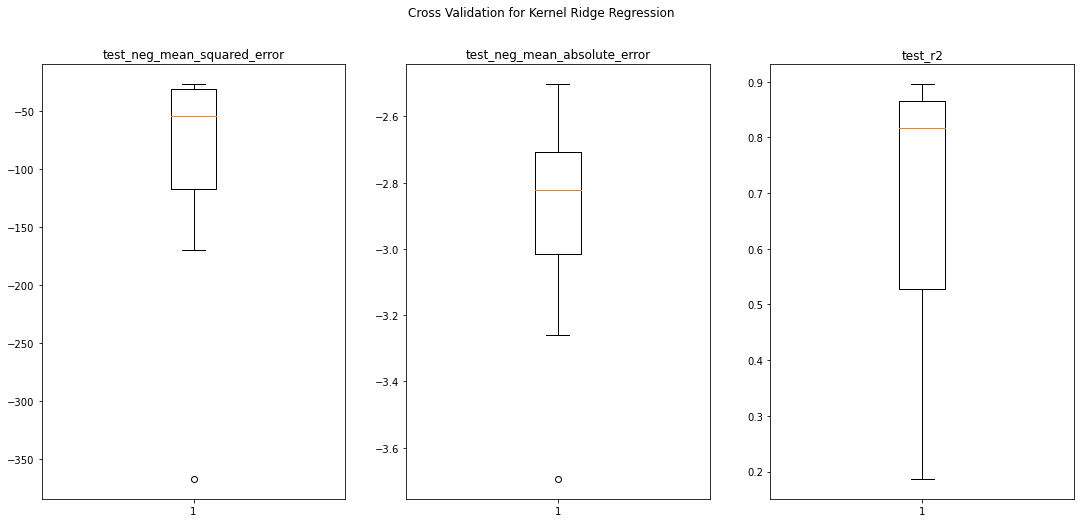

In [18]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Kernel Ridge Regression')
# fig.subplot(1,3)
a[0].boxplot(score2['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score2['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score2['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [19]:
# print(np.mean(score2))

In [20]:
m2 = (R,score2)

# K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred3 = neigh.predict(X_test)
# score3 = neigh.score(X_test,y_test)
score3 =cross_validate(neigh,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
print(score3)
name.append('KNN')
score.append(score3)
# average.append(np.mean(score3))
# maximum.append(max(score3))
# minimum.append(min(score3))

{'fit_time': array([0.01560473, 0.        , 0.        , 0.01560473, 0.01560473,
       0.01557899, 0.01557899, 0.        , 0.        , 0.        ]), 'score_time': array([0.        , 0.01560473, 0.01560473, 0.01557899, 0.01557899,
       0.        , 0.0156703 , 0.0156703 , 0.0156703 , 0.0156703 ]), 'test_neg_mean_squared_error': array([ -23.95432345,  -84.0594034 , -142.96685926,  -43.36396966,
        -38.76692059,  -25.81476254,  -72.838182  ,  -99.00061563,
        -65.27891231, -426.93449156]), 'test_neg_mean_absolute_error': array([-2.20508199, -2.63952145, -2.77251334, -2.55035669, -2.31049148,
       -2.39420829, -2.68718014, -2.6149703 , -2.67057189, -3.63945843]), 'test_r2': array([0.58973588, 0.84968936, 0.73451174, 0.82840909, 0.85016725,
       0.86516965, 0.74835683, 0.46497137, 0.81716349, 0.05417288])}


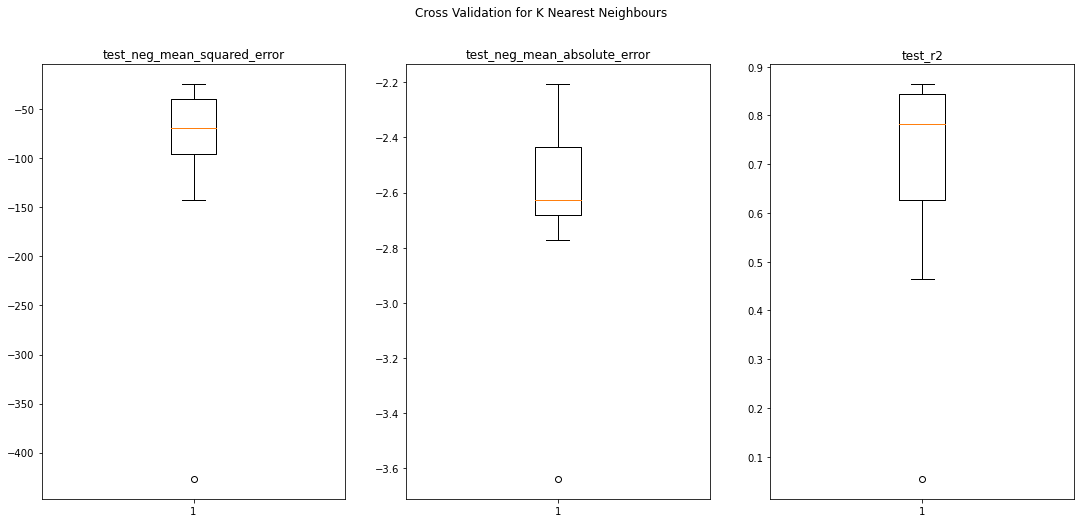

In [23]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for K Nearest Neighbours')
# fig.subplot(1,3)
a[0].boxplot(score3['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score3['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score3['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [24]:
# print(max(score3))

In [25]:
m3 = (neigh,score3)

# Ensemble Methords

# Votting Regressor

In [26]:
from sklearn.ensemble import VotingRegressor

In [27]:
eclf1 = VotingRegressor(estimators=[('cart', m1[0]), ('krr', m2[0]), ('knn', m3[0])])
eclf1.fit(X_train, y_train)

VotingRegressor(estimators=[('cart', DecisionTreeRegressor()),
                            ('krr', KernelRidge(alpha=1.0)),
                            ('knn', KNeighborsRegressor())])

In [28]:
eclf1.score(X_test,y_test)
score4 =cross_validate(eclf1,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
print(score4)
name.append('Votting Regressor')
score.append(score4)
# average.append(np.mean(score4))
# maximum.append(max(score4))
# minimum.append(min(score4))

{'fit_time': array([8.5506382 , 8.60551238, 8.5506382 , 8.46362233, 8.5036974 ,
       8.83704996, 8.80269551, 8.86879015, 8.9459095 , 8.80366492]), 'score_time': array([0.05690122, 0.05445814, 0.05690122, 0.05944204, 0.05933213,
       0.04006672, 0.04801798, 0.04686904, 0.03241467, 0.06249547]), 'test_neg_mean_squared_error': array([ -35.56224832,  -78.62789444, -158.11098244,  -40.57305276,
        -69.3440217 ,  -24.36743793,  -43.96851127, -104.57376086,
        -54.26807152, -404.16184016]), 'test_neg_mean_absolute_error': array([-2.44194373, -2.57142016, -2.91463449, -2.441861  , -2.43618752,
       -2.40122858, -2.48683117, -2.53033743, -2.56133581, -3.5063716 ]), 'test_r2': array([0.39092771, 0.8594017 , 0.70638923, 0.83945273, 0.73198785,
       0.87272901, 0.84809649, 0.43485244, 0.84800321, 0.10462323])}


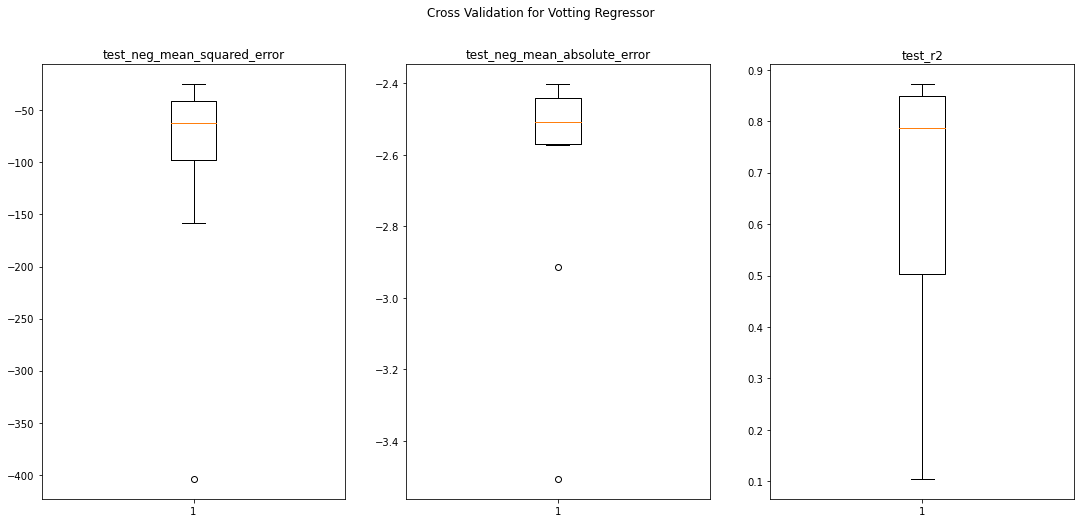

In [29]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Votting Regressor')
a[0].boxplot(score4['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score4['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score4['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [30]:
# np.mean(score4)

# Bagging - Bootstrap aggregation

In [31]:
from sklearn.ensemble import BaggingRegressor

In [32]:
# Using CART
bagging1 =  BaggingRegressor( m1[0], random_state=0)
bagging1.fit(X_train, y_train)
bagging1.score(X_test,y_test)
score5 =cross_validate(bagging1,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
name.append('Bagging using CART')
score.append(score5)
# average.append(np.mean(score5))
# maximum.append(max(score5))
# minimum.append(min(score5))
# bagging

In [33]:
# np.average(score5)

In [34]:
score5

{'fit_time': array([0.55424738, 0.56224442, 0.53030562, 0.54625297, 0.54625297,
        0.52966666, 0.59364176, 0.5456624 , 0.5456624 , 0.52162409]),
 'score_time': array([0.00799704, 0.01604104, 0.00795007, 0.00799441, 0.00799441,
        0.00804782, 0.00799847, 0.00799656, 0.00799608, 0.00799727]),
 'test_neg_mean_squared_error': array([ -17.78828386,  -77.22770047, -115.00753618,  -31.81073337,
        -111.26919929,  -31.58363581,  -50.76547734,  -78.35902668,
         -69.58980217, -404.50992597]),
 'test_neg_mean_absolute_error': array([-2.21879566, -2.81556232, -2.83274329, -2.38304799, -2.63899053,
        -2.45716498, -2.58675695, -2.44435796, -2.62379284, -3.55365498]),
 'test_r2': array([0.69534123, 0.86190546, 0.78643197, 0.87412516, 0.56994855,
        0.83503885, 0.82461416, 0.57652462, 0.80508933, 0.10385208])}

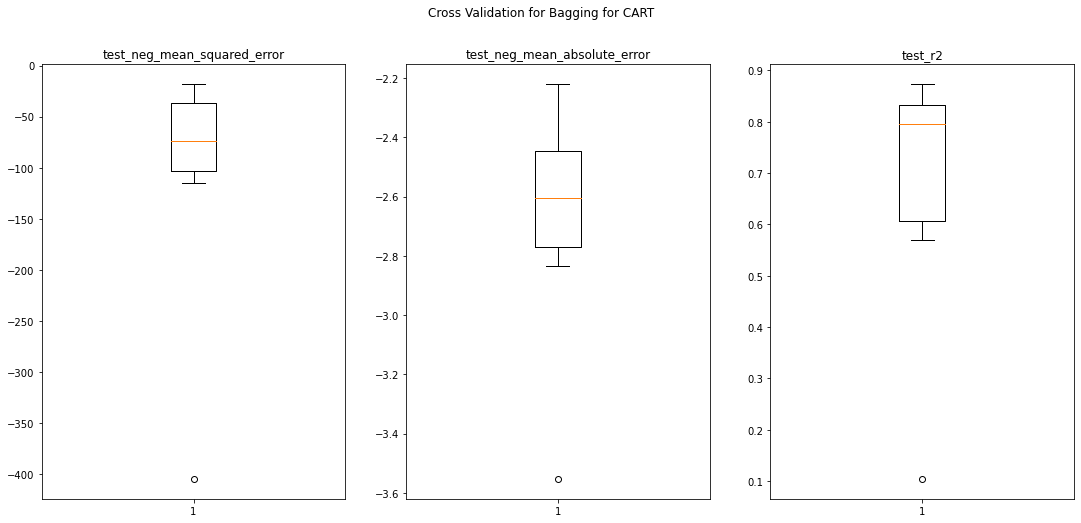

In [35]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Bagging for CART')
a[0].boxplot(score5['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score5['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score5['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [36]:
# # Using KRR
# bagging2 =  BaggingRegressor( m2[0], random_state=0)
# bagging2.fit(X_train, y_train)
# score6 =cross_val_score(bagging2,X_test,y_test, cv=5,n_jobs=5,scoring = scoring)
# bagging2.score(X_test,y_test)
# name.append('Bagging using KRR')
# score.append(score6)
# average.append(np.mean(score6))
# maximum.append(max(score6))
# minimum.append(min(score6))
# # bagging

In [37]:
# # Cross Validation
# fig = plt.figure()
# fig.suptitle('Cross Validation for Bagging with KRR')
# plt.boxplot(score1)
# plt.show()

In [38]:
# Usinf KNN
bagging3 =  BaggingRegressor( m3[0], random_state=0)
bagging3.fit(X_train, y_train)
score7 =cross_validate(bagging3,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
bagging3.score(X_test,y_test)
name.append('Bagging using KNN')
score.append(score7)
# average.append(np.mean(score7))
# maximum.append(max(score7))
# minimum.append(min(score7))
# bagging

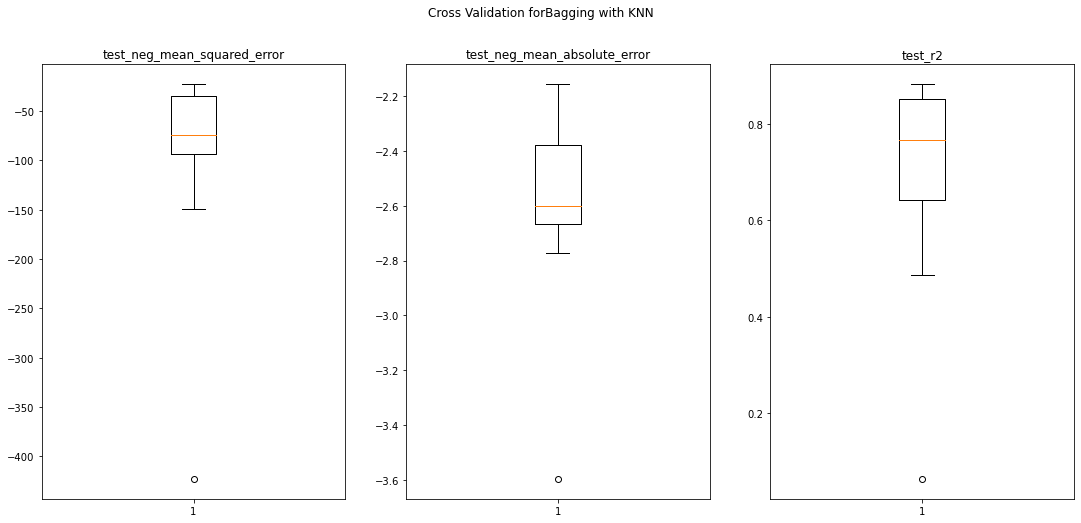

In [39]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation forBagging with KNN')
a[0].boxplot(score7['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score7['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score7['test_r2'])
a[2].set_title('test_r2')
plt.show()

In [41]:
# bagging

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Depts is 4
regr = RandomForestRegressor(max_depth=4, random_state=0)

# Prune tree with no restriction on depth
# regr = RandomForestRegressor()

regr.fit(X_train, y_train)
regr.score(X_test,y_test)
score8 =cross_validate(regr,X_test,y_test, cv=cv,n_jobs=5,scoring = scoring)
name.append('Random Forrest')
score.append(score8)
# average.append(np.mean(score8))
# maximum.append(max(score8))
# minimum.append(min(score8))

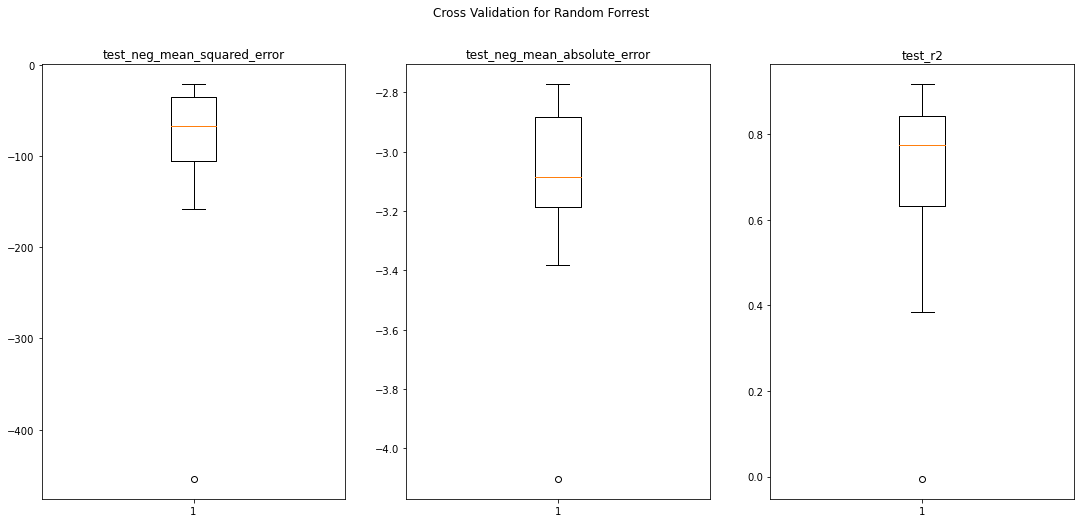

In [43]:
# Cross Validation
fig,a = plt.subplots(1,3)
fig.set_size_inches(18.5, 8)
fig.suptitle('Cross Validation for Random Forrest')
a[0].boxplot(score8['test_neg_mean_squared_error'])
a[0].set_title('test_neg_mean_squared_error')
a[1].boxplot(score8['test_neg_mean_absolute_error'])
a[1].set_title('test_neg_mean_absolute_error')
a[2].boxplot(score8['test_r2'])
a[2].set_title('test_r2')
plt.show()

# Analysis

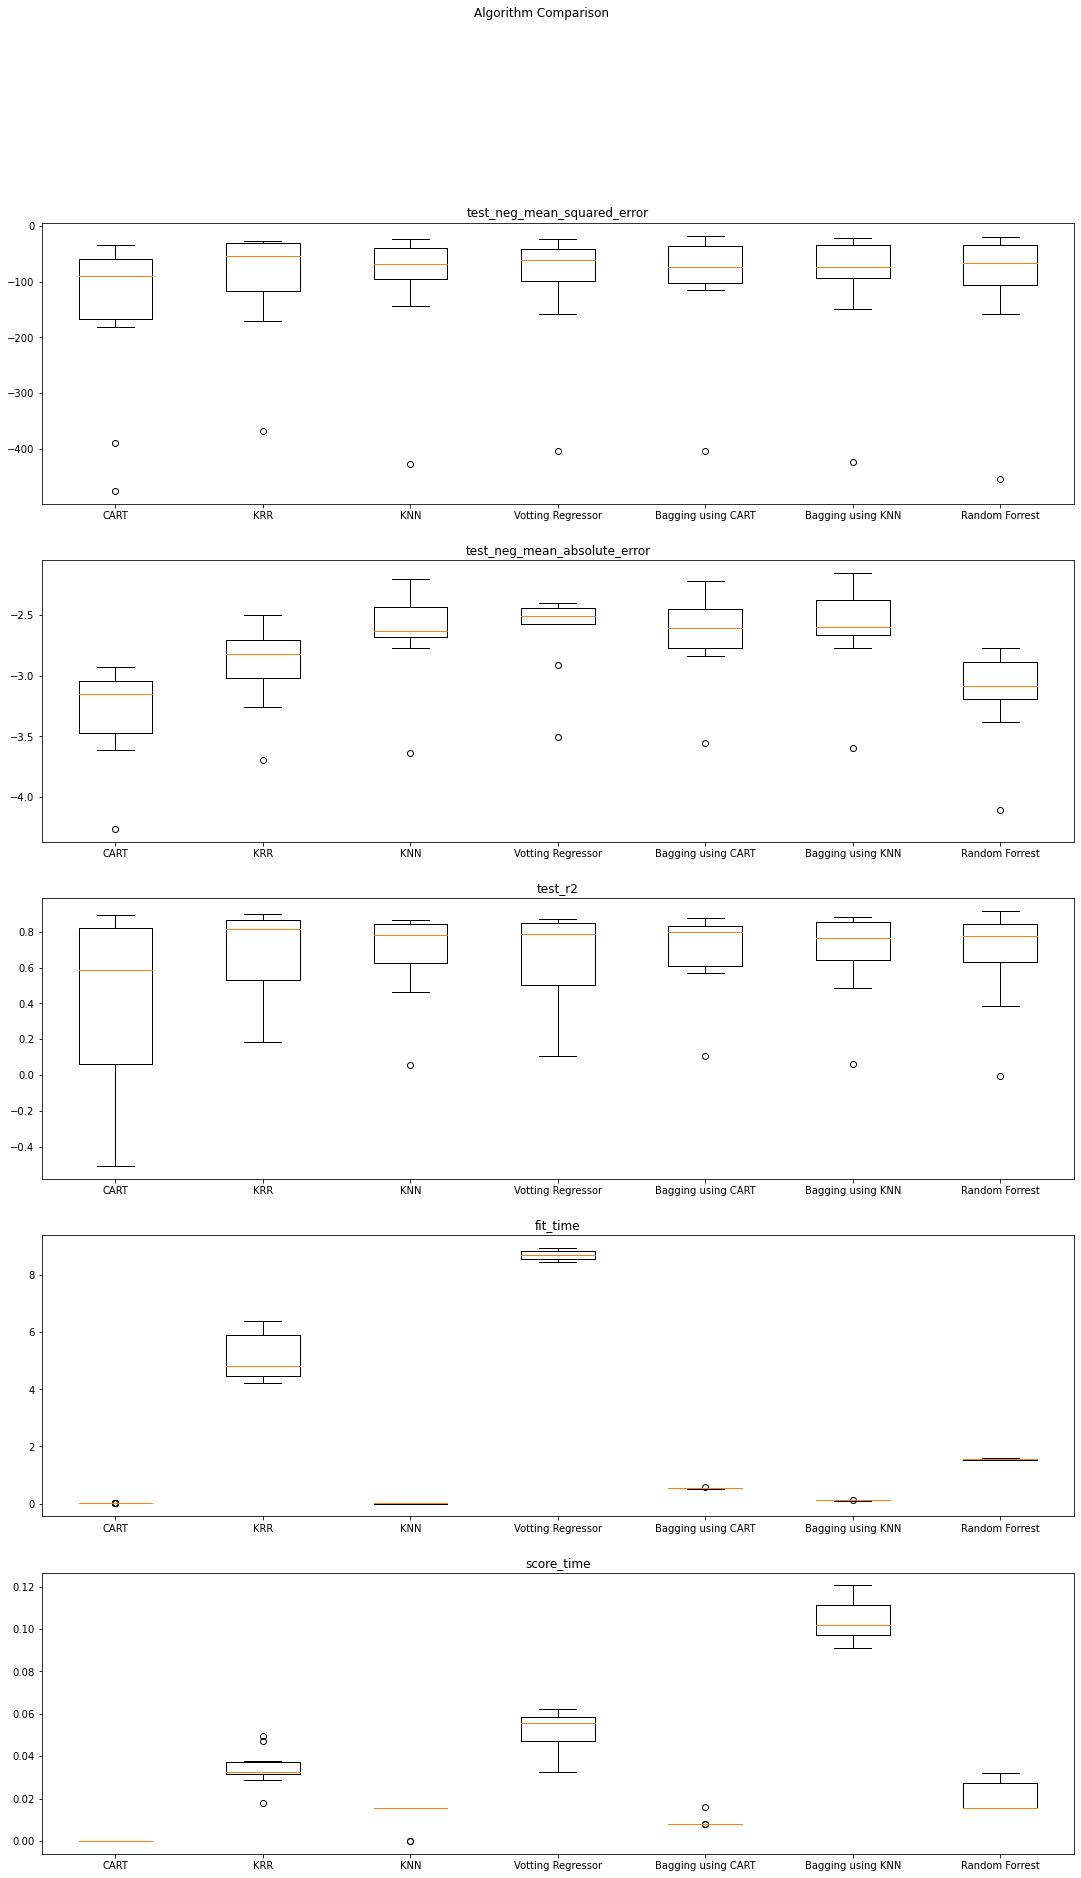

In [44]:
# boxplot algorithm comparison
fig,a = plt.subplots(5,1)
fig.set_size_inches(18.5, 30)
fig.suptitle('Algorithm Comparison')
# fig.set_size_inches(18.5, 10.5)

a[0].boxplot([score1['test_neg_mean_squared_error'],score2['test_neg_mean_squared_error'],score3['test_neg_mean_squared_error'],
                score4['test_neg_mean_squared_error'],score5['test_neg_mean_squared_error'],score7['test_neg_mean_squared_error'],
              score8['test_neg_mean_squared_error']])
a[0].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[0].set_xticklabels(name)
a[0].title.set_text('test_neg_mean_squared_error')

a[1].boxplot([score1['test_neg_mean_absolute_error'],score2['test_neg_mean_absolute_error'],score3['test_neg_mean_absolute_error'],
                score4['test_neg_mean_absolute_error'],score5['test_neg_mean_absolute_error'],score7['test_neg_mean_absolute_error'],
             score8['test_neg_mean_absolute_error']])
a[1].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[1].set_xticklabels(name)
a[1].title.set_text('test_neg_mean_absolute_error')


a[2].boxplot([score1['test_r2'],score2['test_r2'],score3['test_r2'],
                score4['test_r2'],score5['test_r2'],score7['test_r2'],score8['test_r2']])
a[2].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[2].set_xticklabels(name)
a[2].title.set_text('test_r2')


a[3].boxplot([score1['fit_time'],score2['fit_time'],score3['fit_time'],
                score4['fit_time'],score5['fit_time'],score7['fit_time'],score8['fit_time']])
a[3].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[3].set_xticklabels(name)
a[3].title.set_text('fit_time')


a[4].boxplot([score1['score_time'],score2['score_time'],score3['score_time'],
                score4['score_time'],score5['score_time'],score7['score_time'],score8['score_time']])
a[4].set_xticks([1,2,3,4,5,6,7]) #[1,2,3,4,5,6,7]
a[4].set_xticklabels(name)
a[4].title.set_text('score_time')


# ax = fig.add_subplot(111)
# plt.boxplot(score)
# ax.set_xticklabels(name)
plt.show()

In [45]:
# fig = plt.figure()
# fig.suptitle('MAximum')
# ax = fig.add_subplot(111)
# plt.plot(name,maximum)
# plt.xticks(rotation=90)
# # ax.set_xticklabels(name)
# plt.show()

In [46]:
# fig = plt.figure()
# fig.suptitle('minimum')
# ax = fig.add_subplot(111)
# plt.plot(name,minimum)
# plt.xticks(rotation=90)
# # ax.set_xticklabels(name)
# plt.show()

In [47]:
# fig = plt.figure()
# fig.suptitle('Average')
# ax = fig.add_subplot(111)
# plt.plot(name,average)
# plt.xticks(rotation=90)
# # ax.set_xticklabels(name)
# plt.show()

# Model Comparison (Not Sure)

In [49]:
predict_CART = regressor.predict(X_test)
predict_KRR = R.predict(X_test)
predict_KNN = neigh.predict(X_test)
predict_VoReg = eclf1.predict(X_test)
predict_BaggingCART = bagging1.predict(X_test)
predict_BaggingKNN =bagging3.predict(X_test)
predict_RanFor = regr.predict(X_test)

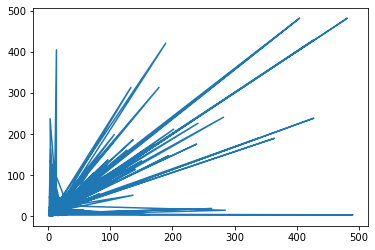

In [67]:
fig = plt.figure()
plt.plot(y_test,predict_CART)
plt.show()

In [57]:
X_test

array([[64.05181818, 28.39772727,  6.73272727],
       [84.43235294, 59.63764706, 16.03117647],
       [80.739375  , 43.16625   , 13.39875   ],
       ...,
       [70.62333333, 32.8575    ,  2.90916667],
       [76.93086957, 44.82652174, 20.95869565],
       [47.0526087 , 50.73      ,  6.97521739]])